# <center>**Summary Notebook**</center>

# **Table of Contents**

- [Introduction](#Introduction)
- [Importing Libraries](#Importing-Libraries)
- [Pre Splitting](#pre-splitting)
- [Data Preprocessing](#Data-Preprocessing)
  - [Categorical EDA](#Categorical-EDA)
  - [Hypothesis Testing](#hypothesis-testing)
  - [Manual Imputing Categories](#Manual-Imputing-Categories)
  - [Numerical EDA](#Numerical-EDA)
- [Feature Engineering](#Feature-Engineering)
- [Feature Selection](#Feature-Selection)
    - [Mathews Correlation](#Mathews-correlation)
    - [variance Inflation Factor checking](#variance-Inflation-Factor-checking)
    - [Condition number](#Condition-number)
- [Over Sampling](#Over-Sampling)
- [Pipeline Building](#Pipeline-Building)
- [Modeling](#Modeling)
- [Model Evaluation](#Model-evaluation)
- [Linear Decision Boundary Analysis](#Linear-Decision-Boundary-Analysis)
- [Problems](#Problems)
- [Solutions](#Solutions)
- [Tree Modeling and Evaluation](#Tree-Modeling-and-evaluation)
- [Conclusion](#Conclusion)

## Introduction
### Week 2 Binary Classification:
- This is a summary notebook for churn analysis

## Importing Libraries

In [1]:
import sys
sys.path.append("../")
import warnings
warnings.simplefilter(action="ignore")
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
import plotly.express as px
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

In [5]:
data=pl.read_csv("./data/W2_TelecomChurn/Customer-Churn.csv")
print(data.shape)
data.head()

(7043, 21)


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""7590-VHVEG""","""Female""",0,"""Yes""","""No""",1,"""No""","""No phone service""","""DSL""","""No""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",29.85,29.85,"""No"""
"""5575-GNVDE""","""Male""",0,"""No""","""No""",34,"""Yes""","""No""","""DSL""","""Yes""","""No""","""Yes""","""No""","""No""","""No""","""One year""","""No""","""Mailed check""",56.95,1889.5,"""No"""
"""3668-QPYBK""","""Male""",0,"""No""","""No""",2,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Mailed check""",53.85,108.15,"""Yes"""
"""7795-CFOCW""","""Male""",0,"""No""","""No""",45,"""No""","""No phone service""","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""One year""","""No""","""Bank transfer (automatic)""",42.3,1840.75,"""No"""
"""9237-HQITU""","""Female""",0,"""No""","""No""",2,"""Yes""","""No""","""Fiber optic""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",70.7,151.65,"""Yes"""


## Pre Splitting

In [6]:
from sklearn.model_selection import train_test_split
train_data,test_data= train_test_split(data,test_size=0.2,random_state=42,stratify=data[["Churn","tenure"]],shuffle=True)  # Holdout set
train_data.shape,test_data.shape

((5634, 21), (1409, 21))

## Data-Preprocessing

In [7]:
train_data.describe()

statistic,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,str,f64,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""count""","""5634""","""5634""",5634.0,"""5634""","""5634""",5634.0,"""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""",5634.0,5625.0,"""5634"""
"""null_count""","""0""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,9.0,"""0"""
"""mean""",null,null,0.163294,null,null,32.388889,null,null,null,null,null,null,null,null,null,null,null,null,65.07035,2296.754436,null
"""std""",null,null,0.369667,null,null,24.561096,null,null,null,null,null,null,null,null,null,null,null,null,30.026572,2273.961342,null
"""min""","""0003-MKNFE""","""Female""",0.0,"""No""","""No""",0.0,"""No""","""No""","""DSL""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""No""","""Bank transfer (automatic)""",18.25,18.8,"""No"""
"""25%""",null,null,0.0,null,null,9.0,null,null,null,null,null,null,null,null,null,null,null,null,36.25,401.5,null
"""50%""",null,null,0.0,null,null,29.0,null,null,null,null,null,null,null,null,null,null,null,null,70.5,1406.0,null
"""75%""",null,null,0.0,null,null,55.0,null,null,null,null,null,null,null,null,null,null,null,null,89.95,3810.8,null
"""max""","""9995-HOTOH""","""Male""",1.0,"""Yes""","""Yes""",72.0,"""Yes""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Two year""","""Yes""","""Mailed check""",118.65,8684.8,"""Yes"""


- Dealing with null values

In [8]:
train_data.filter((train_data["TotalCharges"].is_null()))

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""7644-OMVMY""","""Male""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",19.85,null,"""No"""
"""2775-SEFEE""","""Male""",0,"""No""","""Yes""",0,"""Yes""","""Yes""","""DSL""","""Yes""","""Yes""","""No""","""Yes""","""No""","""No""","""Two year""","""Yes""","""Bank transfer (automatic)""",61.9,null,"""No"""
"""4472-LVYGI""","""Female""",0,"""Yes""","""Yes""",0,"""No""","""No phone service""","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""No""","""Two year""","""Yes""","""Bank transfer (automatic)""",52.55,null,"""No"""
"""5709-LVOEQ""","""Female""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""Two year""","""No""","""Mailed check""",80.85,null,"""No"""
"""4367-NUYAO""","""Male""",0,"""Yes""","""Yes""",0,"""Yes""","""Yes""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",25.75,null,"""No"""
"""1371-DWPAZ""","""Female""",0,"""Yes""","""Yes""",0,"""No""","""No phone service""","""DSL""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""No""","""Two year""","""No""","""Credit card (automatic)""",56.05,null,"""No"""
"""2923-ARZLG""","""Male""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""One year""","""Yes""","""Mailed check""",19.7,null,"""No"""
"""2520-SGTTA""","""Female""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",20.0,null,"""No"""
"""4075-WKNIU""","""Female""",0,"""Yes""","""Yes""",0,"""Yes""","""Yes""","""DSL""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""No""","""Two year""","""No""","""Mailed check""",73.35,null,"""No"""


Very few observations dropping them ratherthan imputing.Model cant learn with 9 observations during cv

In [9]:
train_data=train_data.filter(~(train_data["TotalCharges"].is_null()))
test_data=test_data.filter(~(test_data["TotalCharges"].is_null()))

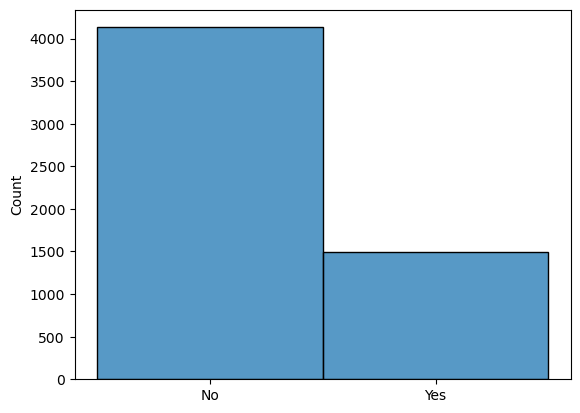

In [10]:
sns.histplot(train_data["Churn"])
plt.show()

- Imbalanced dataSet

Casting yes as 1 and No as 0

In [11]:
train_data=train_data.with_columns(train_data["Churn"].map_elements(lambda x : x=="Yes").cast(pl.Int8))
test_data=test_data.with_columns(test_data["Churn"].map_elements(lambda x : x=="Yes").cast(pl.Int8))

In [12]:
cat_cols=[col for col in train_data.drop("customerID").columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("Churn").columns if train_data[col].dtype!= pl.String]

getting unique columns

In [13]:
train_data=train_data.unique(maintain_order=True,subset=train_data[:,1:].columns) #subset dropping customerid
test_data=test_data.unique(maintain_order=True,subset=test_data[:,1:].columns)

### Categorical EDA

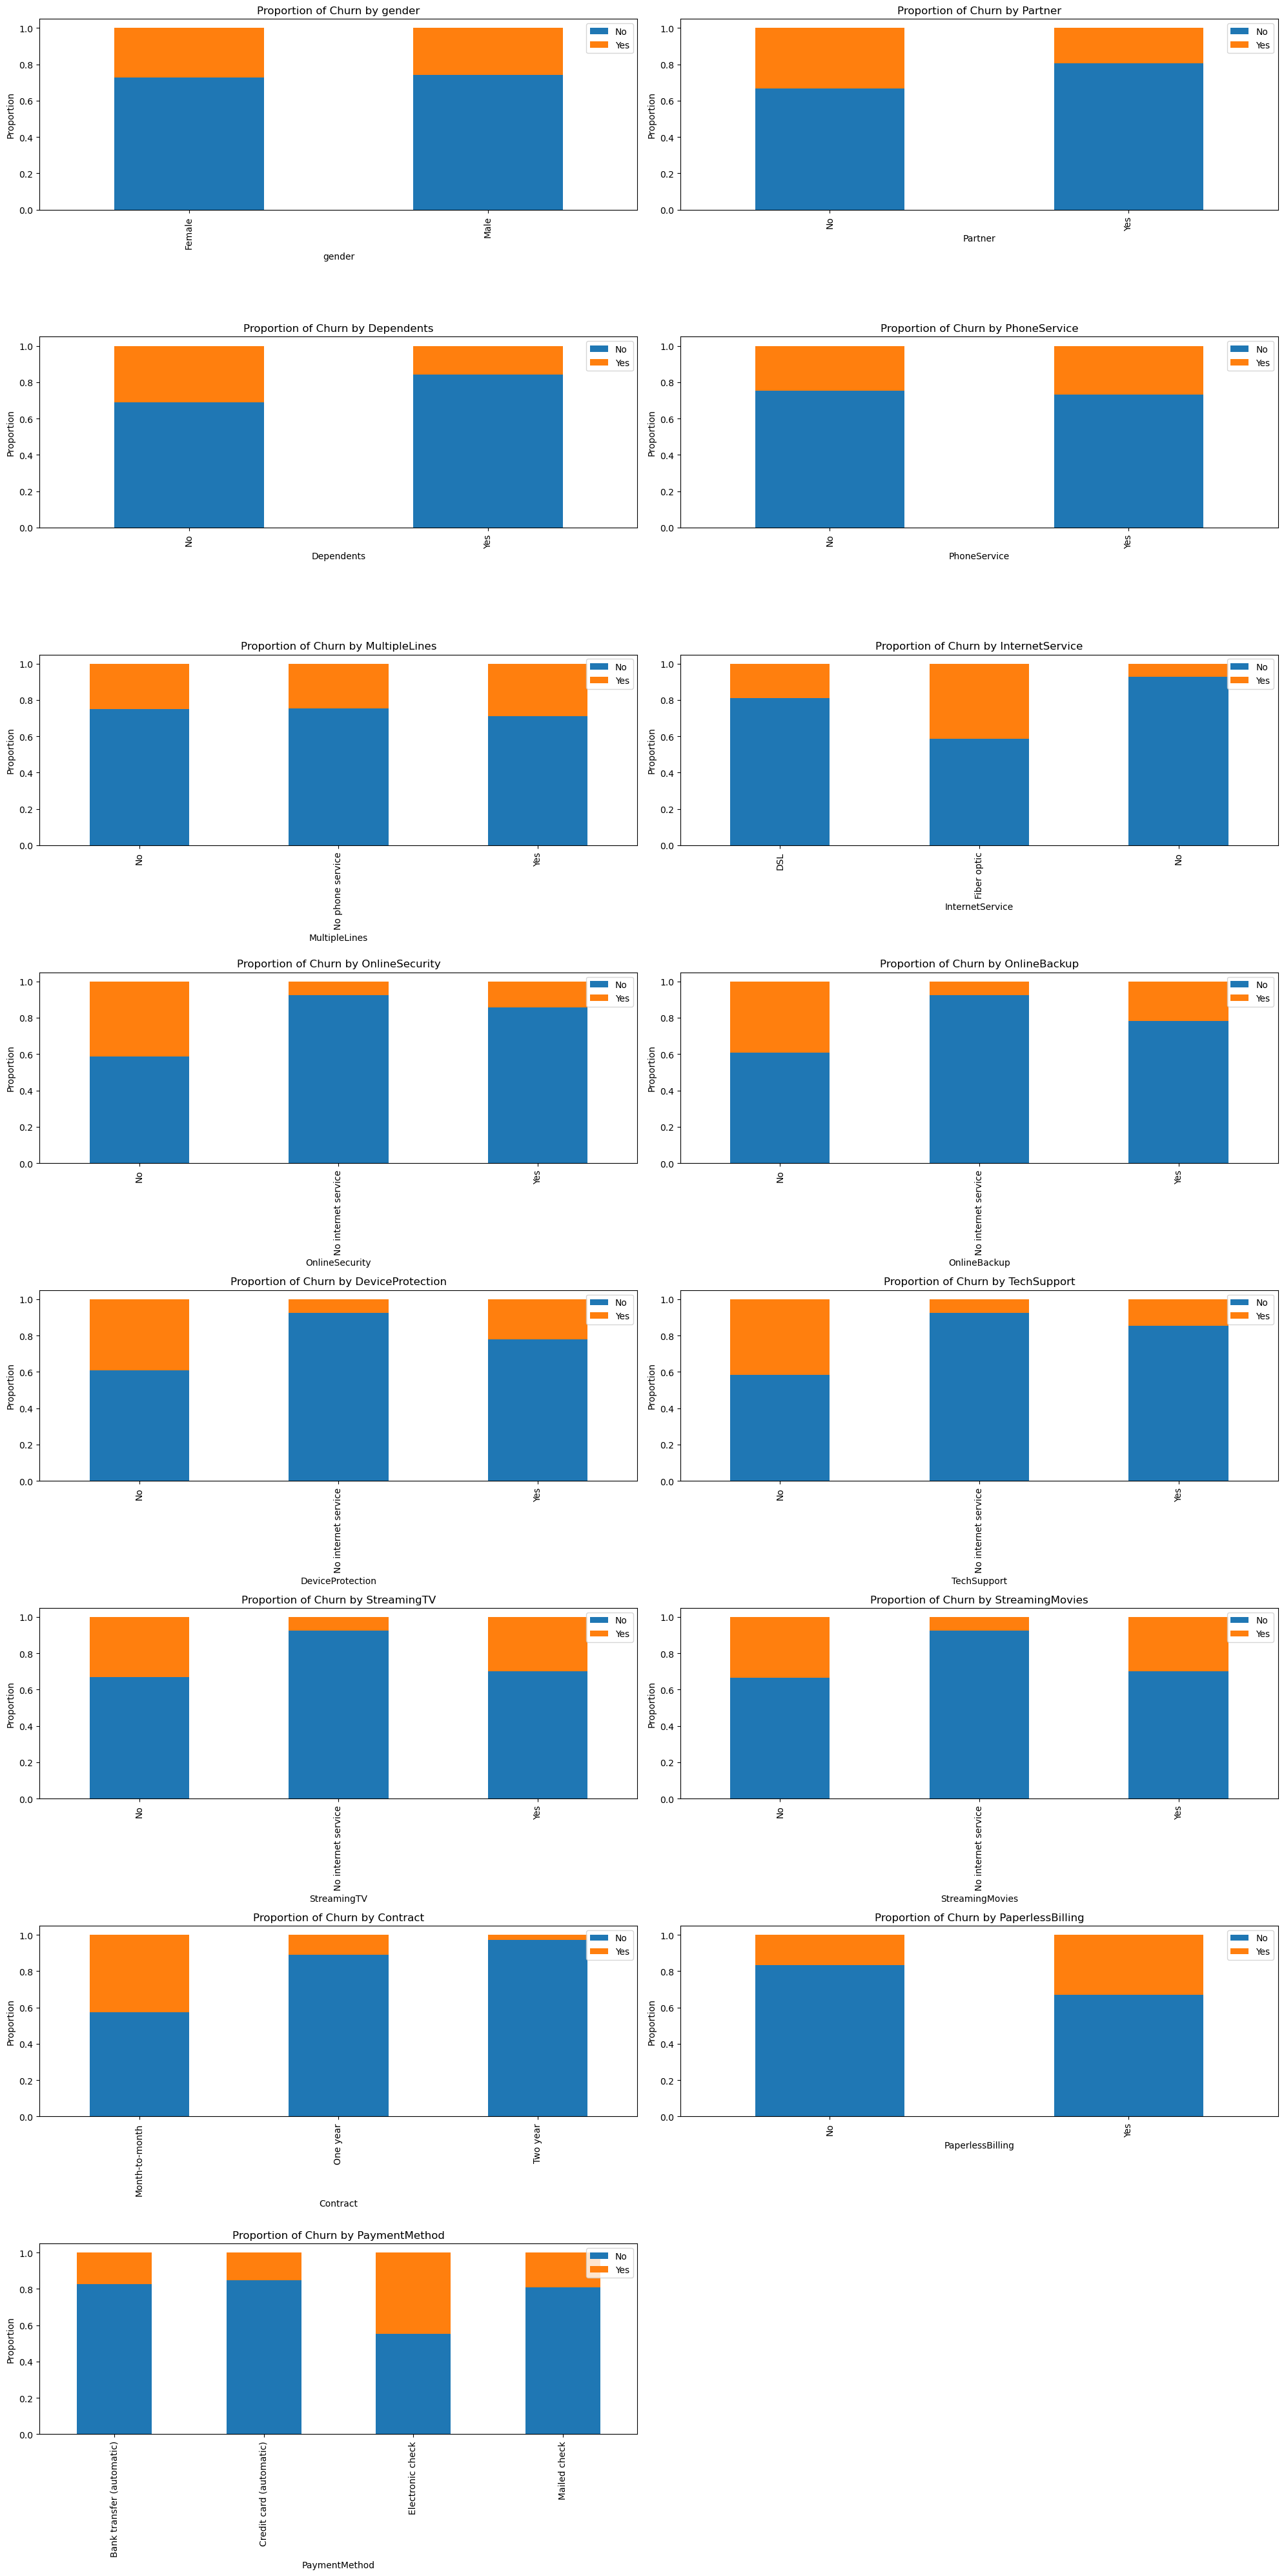

In [14]:
cat_proportion_plot(train_data,cat_cols,"Churn")

More likely to churn
- Having partners,Dependents
- Customers with No (OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport)
- FiberOptic Consumers
- Month-to-Month contracts
- Paperless billing
- Electronic Check payments

### Hypothesis Testing

In [15]:
perform_non_normal_kruskal_hypothesis(train_data,cat_cols,"Churn")

Kruskal-Wallis H-statistic: 1.0455524417032696 P-value: 0.3065336277094252
There is no significant difference in Churn between different gender categories.

Kruskal-Wallis H-statistic: 135.9511166696924 P-value: 2.045036245308761e-31
There is a significant difference in Churn between different Partner categories.

Kruskal-Wallis H-statistic: 136.96117706258627 P-value: 1.2296586554505942e-31
There is a significant difference in Churn between different Dependents categories.

Kruskal-Wallis H-statistic: 1.10945410492557 P-value: 0.2922006447836433
There is no significant difference in Churn between different PhoneService categories.

Kruskal-Wallis H-statistic: 11.091912100683393 P-value: 0.0039032097545810816
There is a significant difference in Churn between different MultipleLines categories.

Kruskal-Wallis H-statistic: 556.3593796293309 P-value: 1.5420403430610444e-121
There is a significant difference in Churn between different InternetService categories.

Kruskal-Wallis H-statist

Similar results from hypothesis tests except : it shows few more features are significant:
- Streaming Tv
- Streaming Movies

In [16]:
train_data=train_data.drop("PhoneService","gender")
test_data=test_data.drop("PhoneService","gender")
cat_cols.remove("PhoneService")
cat_cols.remove("gender")

marking count of more churning categories to 1 for experimenting Logical gates based feature engineering

### Manual Imputing Categories

In [17]:
for col in ['Partner','Dependents','PaperlessBilling']:
    train_data=train_data.with_columns(train_data[col].str.replace_many(["Yes","No"],["1","0"]).cast(pl.Int8))
    test_data=test_data.with_columns(test_data[col].str.replace_many(["Yes","No"],["1","0"]).cast(pl.Int8))

In [18]:
train_data=train_data.with_columns(train_data['MultipleLines'].replace("No phone service","No"))
train_data=train_data.with_columns(train_data['InternetService'].str.replace_many(["Fiber optic","DSL","No"],["0","1","2"]).cast(pl.Int8))
train_data=train_data.with_columns(train_data['Contract'].str.replace_many(["Month-to-month","One year","Two year"],["1","12","24"]).cast(pl.Int8))

test_data=test_data.with_columns(test_data['MultipleLines'].replace("No phone service","No"))
test_data=test_data.with_columns(test_data['InternetService'].str.replace_many(["Fiber optic","DSL","No"],["0","1","2"]).cast(pl.Int8))
test_data=test_data.with_columns(test_data['Contract'].str.replace_many(["Month-to-month","One year","Two year"],["1","12","24"]).cast(pl.Int8))

cat_cols=[col for col in train_data.drop("customerID").columns if train_data[col].dtype== pl.String]
modified_cols = ['MultipleLines',"InternetService",'Contract']

In [19]:
for col in cat_cols:
    train_data=train_data.with_columns(train_data[col].str.replace("No internet service","No"))
    test_data=test_data.with_columns(test_data[col].str.replace("No internet service","No"))

### Numerical EDA

- Univariate Analysis

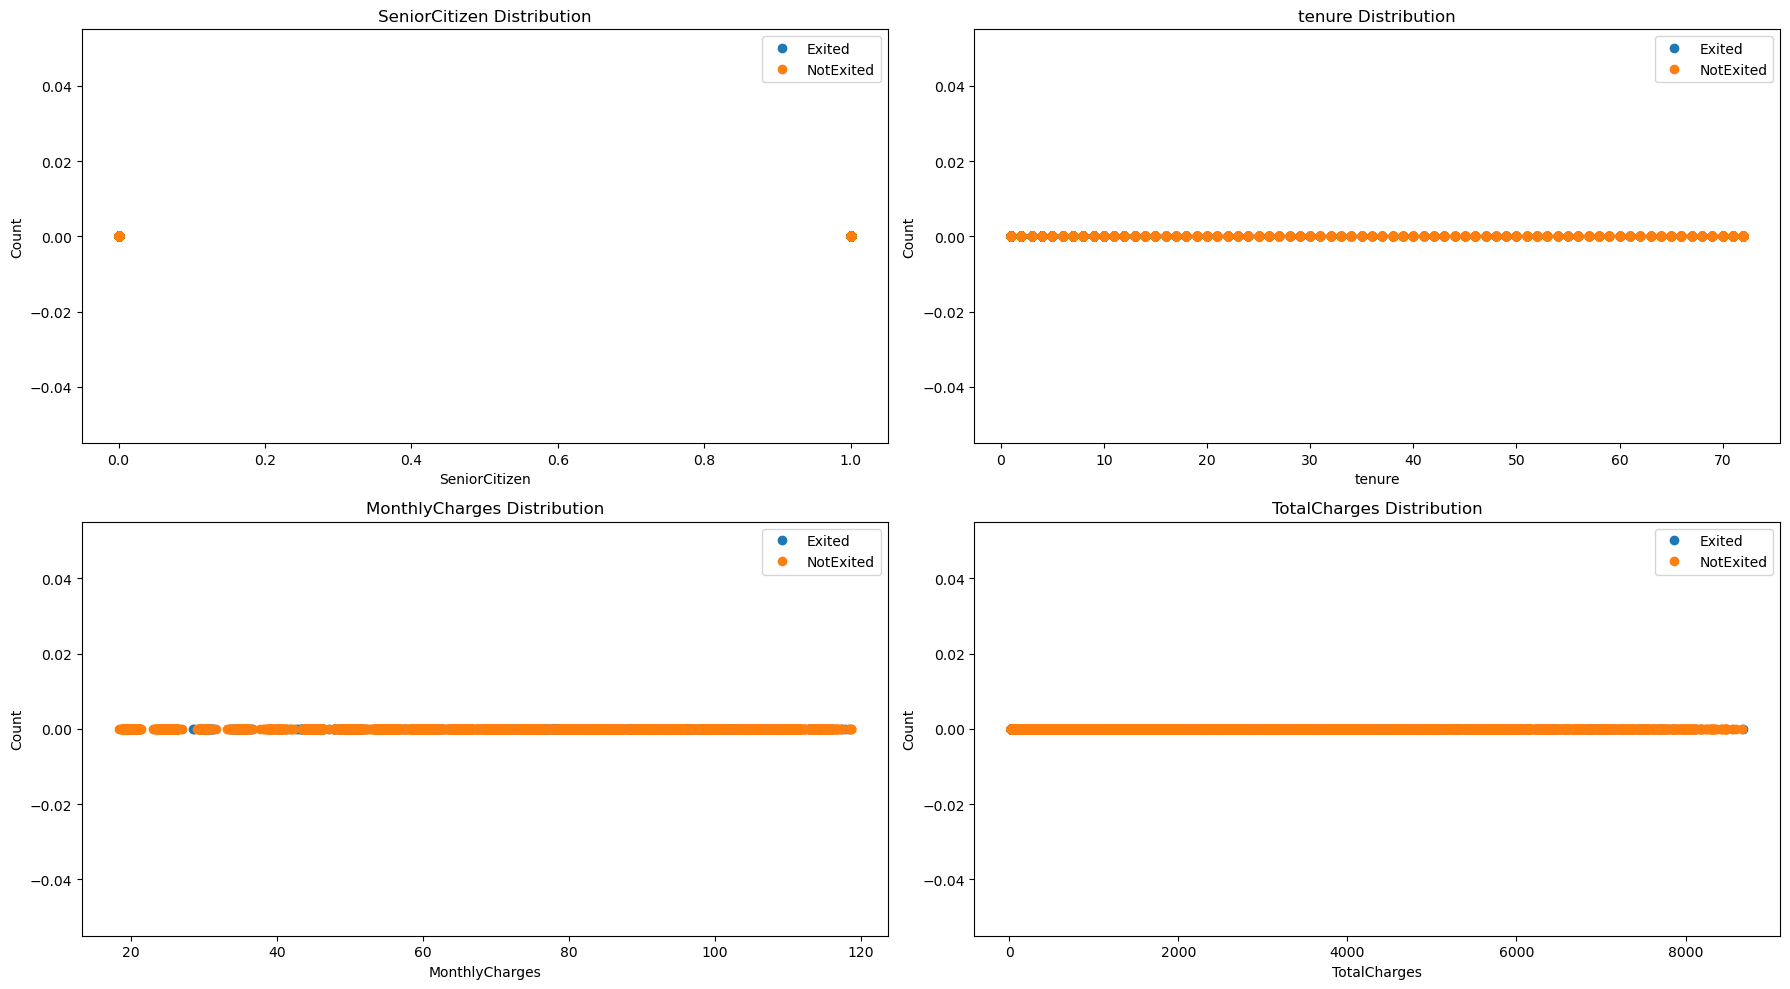

In [20]:
df_Churn = train_data.filter(train_data['Churn']==1)
df_notChurn = train_data.filter(train_data['Churn']==0)
univariavte_lineplots(df_Churn, df_notChurn, num_cols)

Data is not liner separable by single feature

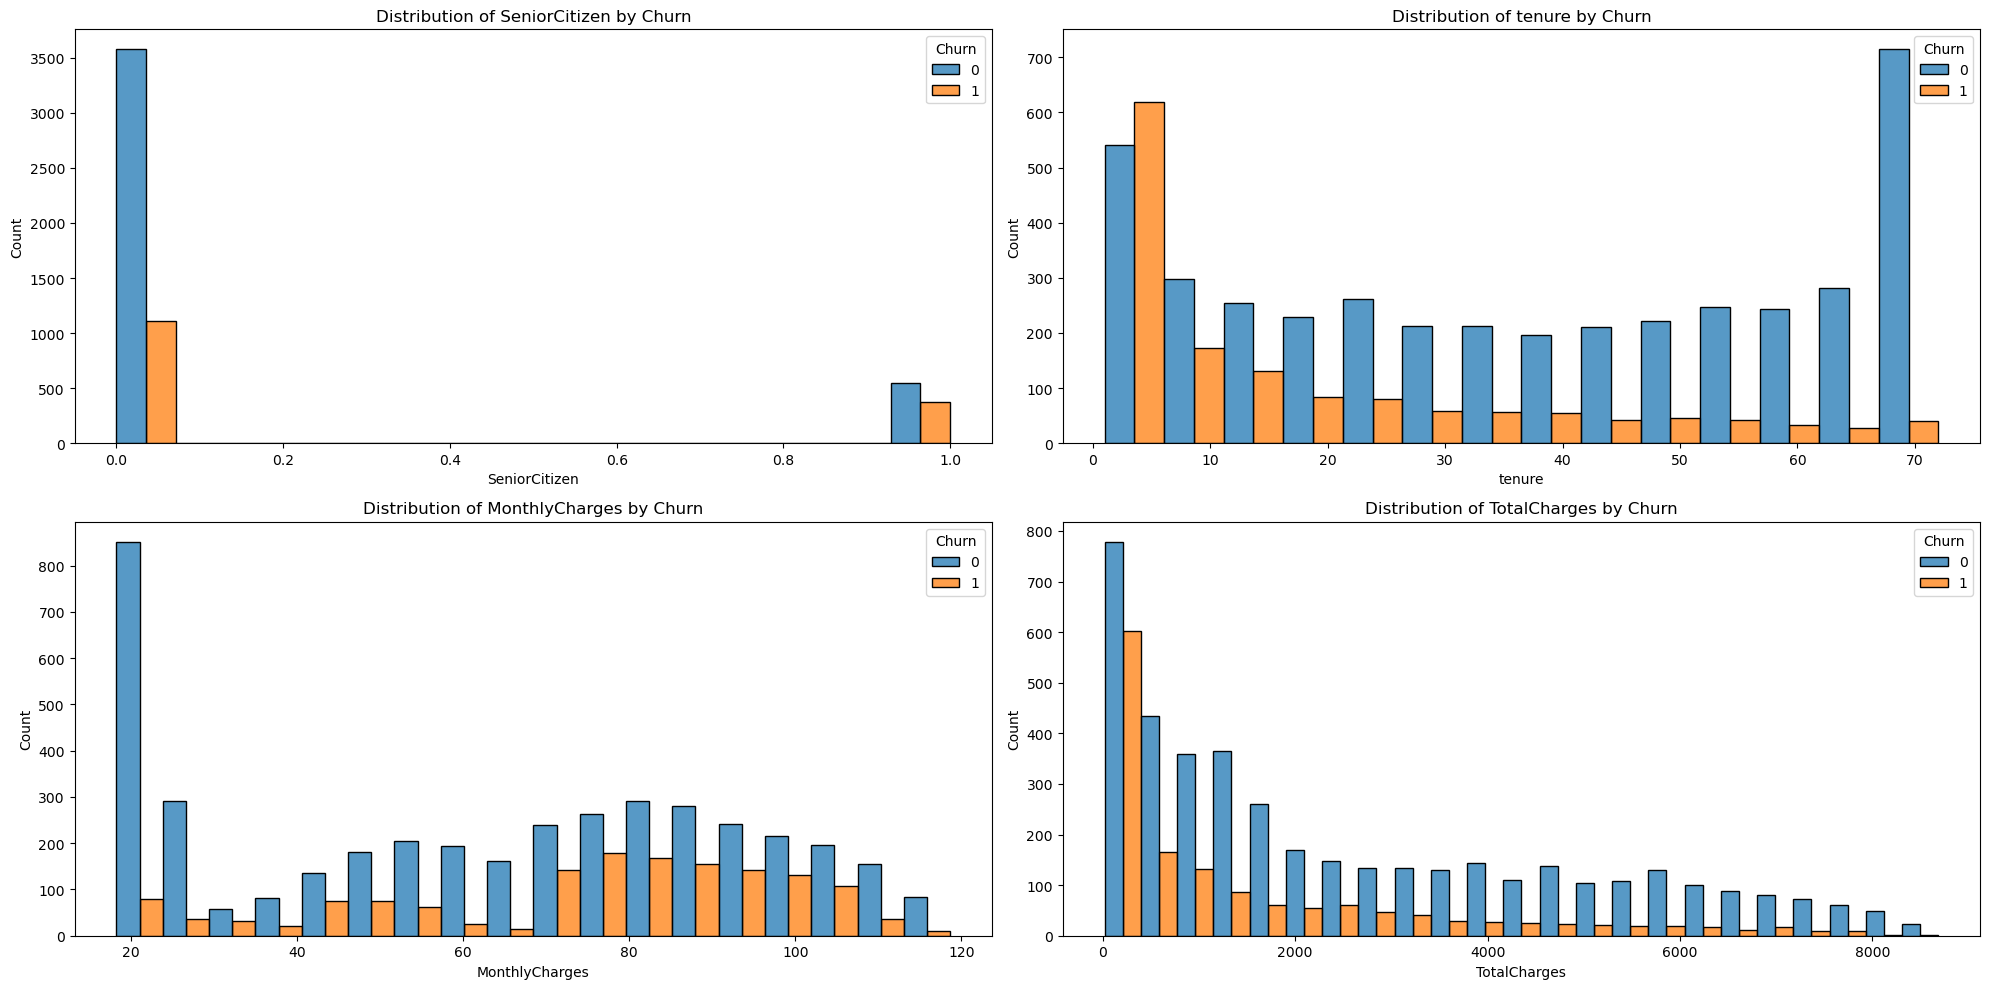

In [21]:
num_dodge_plot(train_data,num_cols,"Churn")

Less tenure or new people are more likely to Churn

- Bivariate Analysis

## Feature Engineering

* **Streamer:** This feature combines `StreamingMovies` and `StreamingTV` into a single feature indicating whether a customer subscribes to any streaming service.
* **Safer:** This feature combines `OnlineSecurity`, `DeviceProtection`, and `OnlineBackup` into a single feature indicating a customer's preference for online security services.
* **Family:** This feature combines `Partner` and `Dependents` into a single feature indicating the presence of a family unit within a customer's household.
* **OnlinePayment:** This feature combines `PaperlessBilling` and `ElectricCheck` into a single feature indicating a customer's preference for online payment methods.
* **All:** This feature combines `Streamer`, `Safer`, and `Family` to create a group representing customers who potentially use all three service categories (streaming, security, and family plans).

We believe these new features can better capture customer preferences and potentially improve model performance.if not we can drop them


In [22]:
# replacing yes 1 and No 0
for col in cat_cols[:-1]:
    train_data=train_data.with_columns(train_data[col].str.replace_many(["Yes","No"],["1","0"]).cast(pl.Int8))
    test_data=test_data.with_columns(test_data[col].str.replace_many(["Yes","No"],["1","0"]).cast(pl.Int8))
train_data=train_data.with_columns(train_data["PaymentMethod"].is_in(["Electronic check"]).cast(pl.Int8).alias("ElectricCheck")).drop("PaymentMethod")
test_data=test_data.with_columns(test_data["PaymentMethod"].is_in(["Electronic check"]).cast(pl.Int8).alias("ElectricCheck")).drop("PaymentMethod")

In [23]:
train_data=train_data.with_columns(pl.Series((train_data["StreamingMovies"] | train_data["StreamingTV"])).alias("Streamer")).drop("StreamingMovies","StreamingTV")
train_data=train_data.with_columns(pl.Series(train_data["OnlineSecurity"] | train_data["DeviceProtection"] | train_data['OnlineBackup']).alias("Safer"))#.drop("OnlineSecurity","DeviceProtection","OnlineBackup")
train_data=train_data.with_columns(pl.Series(train_data['Partner'] | train_data['Dependents']).alias("Family")).drop("Partner","Dependents")
train_data=train_data.with_columns(pl.Series(train_data['PaperlessBilling'] & train_data["ElectricCheck"]).alias("OnlinePayment")).drop("PaperlessBilling","ElectricCheck")
train_data=train_data.with_columns(pl.Series(train_data["Streamer"] & train_data["Safer"] & train_data['Family']).alias("All"))


test_data=test_data.with_columns(pl.Series((test_data["StreamingMovies"] | test_data["StreamingTV"])).alias("Streamer")).drop("StreamingMovies","StreamingTV")
test_data=test_data.with_columns(pl.Series(test_data["OnlineSecurity"] | test_data["DeviceProtection"] | test_data['OnlineBackup']).alias("Safer"))#.drop("OnlineSecurity","DeviceProtection","OnlineBackup")
test_data=test_data.with_columns(pl.Series(test_data['Partner'] | test_data['Dependents']).alias("Family")).drop("Partner","Dependents")
test_data=test_data.with_columns(pl.Series(test_data['PaperlessBilling'] & test_data["ElectricCheck"]).alias("OnlinePayment")).drop("PaperlessBilling","ElectricCheck")
test_data=test_data.with_columns(pl.Series(test_data["Streamer"] & test_data["Safer"] & test_data['Family']).alias("All"))

In [24]:
cat_cols=[col for col in train_data.drop("customerID").columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("Churn").columns if train_data[col].dtype!= pl.String]

Non Binary Features

In [25]:
non_binary_cols=[col for col in num_cols if len(train_data[col].unique())>2]
binary_cols=[col for col in num_cols if len(train_data[col].unique())==2]
non_binary_cols

['tenure', 'InternetService', 'Contract', 'MonthlyCharges', 'TotalCharges']

## Feature Selection

### Mathews-correlation

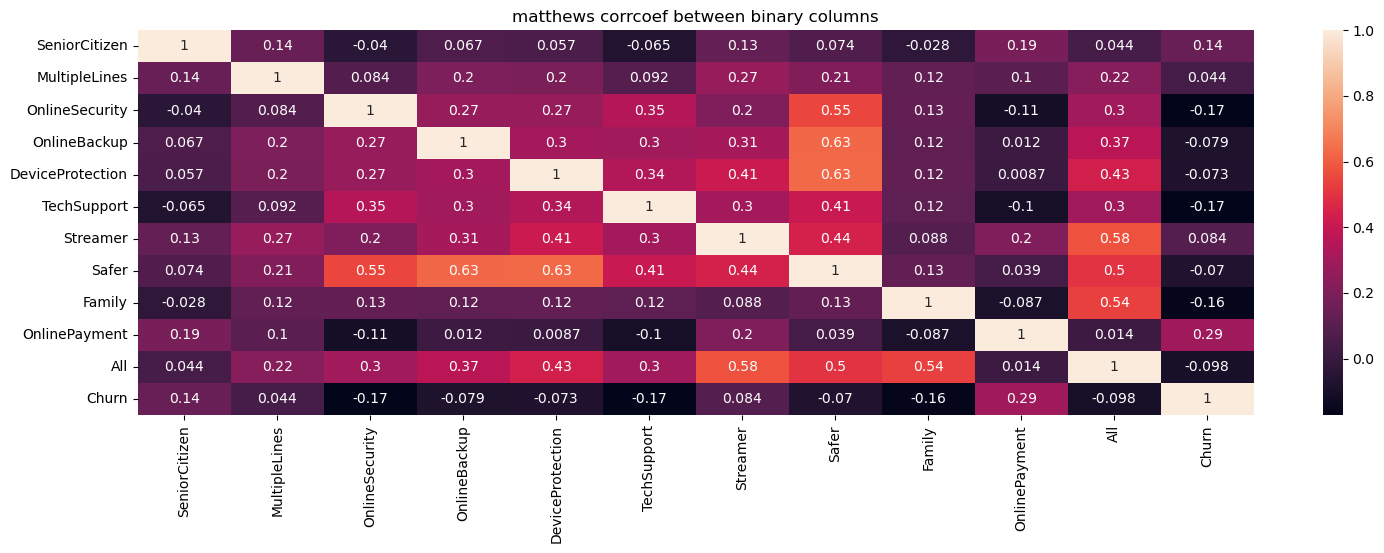

In [26]:
plot_binarycols_heatmap(train_data,binary_cols+["Churn"])

In [27]:
train_data_fe=train_data.drop("MultipleLines","OnlineBackup","DeviceProtection")
test_data_fe=test_data.drop("MultipleLines","OnlineBackup","DeviceProtection")

### Variance Inflation Factor checking

In [28]:
calculate_vif(train_data_fe,"Churn",head=8)

,variables,VIF
0,const,114.089471
7,MonthlyCharges,18.788121
8,TotalCharges,10.925870
3,InternetService,10.364330
2,tenure,7.460368
9,Streamer,2.919687
13,All,2.850515
6,Contract,2.412211


### Condition Number

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

cat_cols=[col for col in train_data_fe.drop("customerID").columns if train_data_fe[col].dtype== pl.String]
num_cols=[col for col in train_data_fe.drop("Churn").columns if train_data_fe[col].dtype!= pl.String]

X_train=train_data_fe.drop("customerID","Churn").to_pandas()
y_train=train_data_fe["Churn"].to_pandas()
X_test=test_data_fe.drop("customerID","Churn").to_pandas()
y_test=test_data_fe["Churn"].to_pandas()

transformer = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(handle_unknown="ignore",drop='first'), cat_cols),
        ("scaler", StandardScaler(), num_cols)
     ],
    remainder="passthrough",
)
print(f"Condition Number : {np.linalg.cond(transformer.fit_transform(X_train))}")

Condition Number : 12.143465008161773


In [30]:
cat_cols=["SeniorCitizen","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","Contract","Streamer","Safer","Family","OnlinePayment","All"]
num_cols=train_data.drop(["Churn","customerID"]+cat_cols)
X_train=train_data.drop("customerID","Churn").to_pandas()
y_train=train_data["Churn"].to_pandas()
X_test=test_data.drop("customerID","Churn").to_pandas()
y_test=test_data["Churn"].to_pandas()

## OverSampling

- Using Smote Nominal and Continuous [Learn More](https://towardsdatascience.com/class-imbalance-from-smote-to-smote-n-759d364d535b)

In [31]:
from imblearn.over_sampling import SMOTEN
sm=SMOTEN(random_state=42,n_jobs=-1)
X_train_smote,y_train_smote=sm.fit_resample(X_train,y_train)
X_test_smote,y_test_smote=sm.fit_resample(X_test,y_test)

In [32]:
balanced_train=pl.from_pandas(X_train_smote).hstack(pl.DataFrame(y_train_smote.to_numpy(),schema=["Churn"]))
balanced_test=pl.from_pandas(X_test_smote).hstack(pl.DataFrame(y_test_smote.to_numpy(),schema=["Churn"]))

In [33]:
balanced_train.shape,balanced_test.shape

((8250, 17), (2062, 17))

## Pipeline Building

In [34]:
from sklearn.model_selection import cross_val_predict,RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score,recall_score,matthews_corrcoef
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.feature_selection import SelectKBest

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

param_distributions = {
    'classifier__C': Real(1e-6, 1e+3, prior='log-uniform'),
    'classifier__max_iter': Integer(100, 1000),
    'classifier__penalty': Categorical(['l1', 'l2']),
    'classifier__fit_intercept': Categorical([True, False]),
    'classifier__solver': Categorical(['liblinear', 'saga'])
}

cat_cols=["SeniorCitizen","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","Contract","Streamer","Safer","Family","OnlinePayment","All"]
num_cols=train_data.drop(["Churn","customerID"]+cat_cols).columns

transformer = ColumnTransformer(transformers=[("num",StandardScaler(),num_cols)]
                                ,remainder='passthrough')

rskf= RepeatedStratifiedKFold(n_repeats=3,n_splits=3,random_state=42)

pipe_smote = Pipeline(
    [
        ("transformer", transformer),
        ('select',SelectKBest(k=10)),
        ("classifier", LogisticRegression(random_state=42)),
    ]
)
pipe_smote

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('select', SelectKBest()),
                ('classifier', LogisticRegression(random_state=42))])

## Modeling

In [35]:
search = BayesSearchCV(
    estimator=pipe_smote,cv=rskf,
    search_spaces=param_distributions,
    n_iter=50,random_state=42,scoring='roc_auc')  

search.fit(X_train_smote, y_train_smote)
best_params = search.best_params_


pipe_smote.set_params(**best_params)
pipe_smote.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('select', SelectKBest()),
                ('classifier',
                 LogisticRegression(C=0.06922291389019798, penalty='l1',
                                    random_state=42, solver='saga'))])

## Model Evaluation

Mean Train roc auc Score: 0.8648842754820937
Mean Train recall Score: 0.802989898989899

Mean Test roc auc Score: 0.8640439889807162
Mean Test recall Score: 0.8026666666666666
Recall score: 0.84
Correlation : 0.6222337451760501
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      1031
           1       0.79      0.84      0.82      1031

    accuracy                           0.81      2062
   macro avg       0.81      0.81      0.81      2062
weighted avg       0.81      0.81      0.81      2062



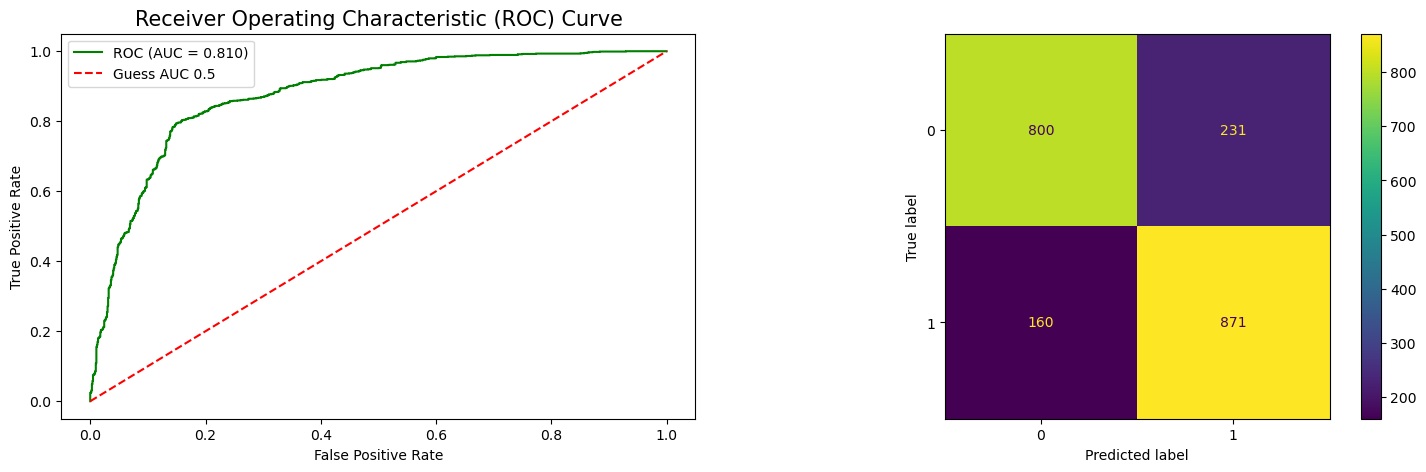

In [36]:
from sklearn.model_selection import cross_validate
# Evaluation
cv_results = cross_validate(pipe_smote, X_train_smote,y_train_smote, cv=rskf, scoring=['recall','roc_auc'],n_jobs=-1,return_train_score=True,error_score="raise")
from sklearn.model_selection import cross_validate,RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=42)

cv_results = cross_validate(pipe_smote, X_train_smote,y_train_smote, cv=rskf, scoring=['recall','roc_auc'],n_jobs=-1,return_train_score=True,error_score="raise")
print(f'Mean Train roc auc Score: {cv_results["train_roc_auc"].mean()}')
print(f'Mean Train recall Score: \033[1m{cv_results["train_recall"].mean()}\033[0m\n')

print(f'Mean Test roc auc Score: {cv_results["test_roc_auc"].mean()}')
print(f'Mean Test recall Score: \033[1m{cv_results["test_recall"].mean()}\033[0m')
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,recall_score
from sklearn.model_selection import cross_val_predict
# Evaluation
predictions_prob= cross_val_predict(pipe_smote,X_test_smote,y_test_smote,method='predict_proba',n_jobs=-1)
predictions=[0 if x < 0.5 else 1 for x in predictions_prob[:,1]]
roc_auc = roc_auc_score(y_test_smote, predictions)
recall = recall_score(y_test_smote,predictions)
coef = matthews_corrcoef(y_test_smote,predictions)
print(f"\033[1mRecall score: {recall:.2f}\033[0m")
print(f"Correlation : {coef}")
print("\033[4mClassification Report\033[0m \n",classification_report(y_test_smote,predictions))
fpr, tpr, thresholds=roc_curve(y_test_smote,predictions_prob[:,1])
plot_evaluation(fpr, tpr,y_test_smote,predictions,roc_auc)

In [37]:
train_data = balanced_train
test_data = balanced_test
print(train_data.shape)
train_data.head()

(8250, 17)


SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges,Streamer,Safer,Family,OnlinePayment,All,Churn
i64,i64,i8,i8,i8,i8,i8,i8,i8,f64,f64,i8,i8,i8,i8,i8,i8
0,51,0,1,1,0,1,1,12,60.15,3077.0,1,1,1,0,1,0
0,5,0,2,0,0,0,0,12,20.1,85.1,0,0,1,0,0,0
0,28,0,0,0,0,0,0,1,81.05,2227.1,1,0,1,1,0,1
0,2,0,0,0,0,0,0,1,79.75,164.5,1,0,0,1,0,1
0,30,1,0,1,1,0,0,1,94.3,2679.7,1,1,0,0,0,0


## Linear Decision Boundary Analysis

In [38]:
pipe = pipe_smote
del pipe_smote

In [39]:
cat_cols=["SeniorCitizen","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","Contract","Streamer","Safer","Family","OnlinePayment","All"]
num_cols=train_data.drop(["Churn","customerID"]+cat_cols).columns

X_train=train_data.drop("customerID","Churn").to_pandas()
y_train=train_data["Churn"].to_pandas()
X_test=test_data.drop("customerID","Churn").to_pandas()
y_test=test_data["Churn"].to_pandas()

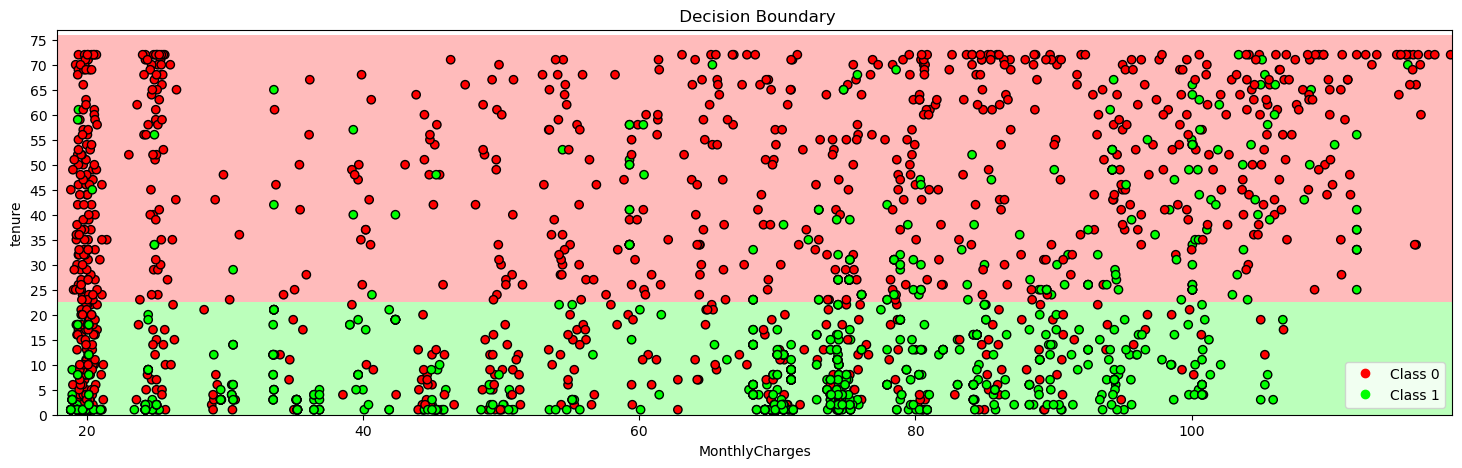

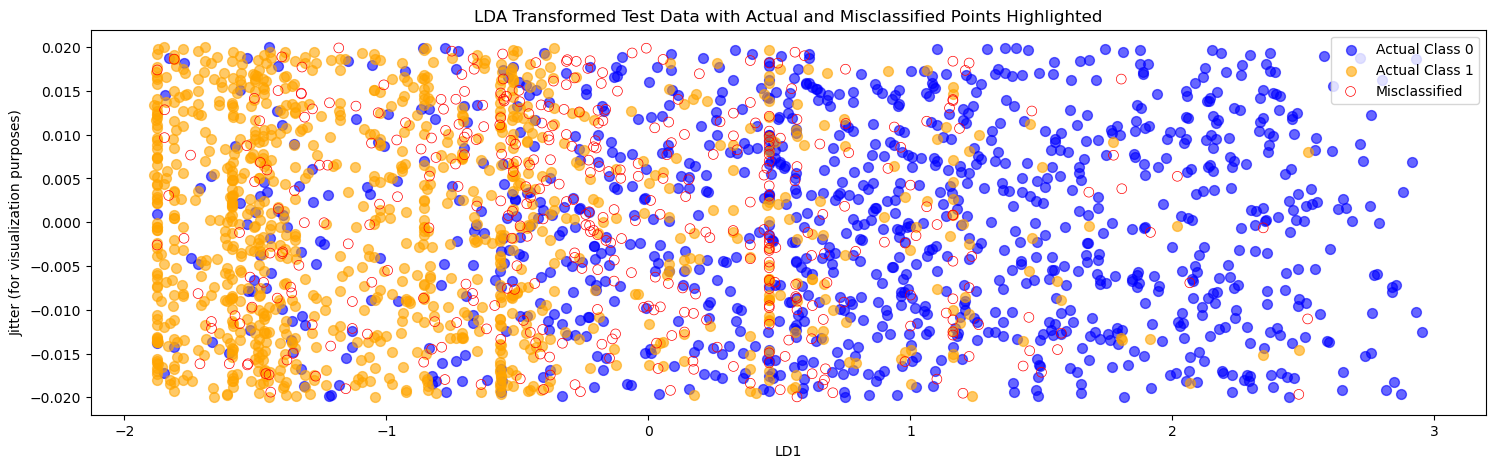

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest


# Plotting decision boundary
classifier = pipe.named_steps['classifier']
transformer = Pipeline(steps=[("transformer",pipe.named_steps['transformer']),("select",SelectKBest(k=10))])
transformer.fit(X_train,y_train)# Select two features (example: 'MonthlyCharges' and 'Contract')
feature1 = 'MonthlyCharges'
feature2 = 'tenure'
decision_boundary(X_test,y_test,feature1,feature2,classifier,transformer) # User defined Function

# Creating LDA Plot of Class visualization

transformer = ColumnTransformer(transformers=
                                [
                                    ("num",StandardScaler(),num_cols)
                                ],remainder='passthrough')
lda_pipe = Pipeline(
    [
        ("transformer", transformer),
        ('select',SelectKBest()),
        ("classifier", LinearDiscriminantAnalysis()),
    ]
)
lda_pipe.fit(X_train,y_train)

from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_predict
rskf = RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=42)

predictions_prob= cross_val_predict(lda_pipe,X_test,y_test,method='predict_proba',n_jobs=-1)
predictions=[0 if x < 0.5 else 1 for x in predictions_prob[:,1]]
X_train_lda=lda_pipe.transform(X_train)
X_test_lda=lda_pipe.transform(X_test)
# Creating the plot
plt.figure(figsize=(18, 5))
point_size = 50  # Adjust point size as needed
jitter = 0.02  # Adjust jitter as needed

for actual_class in [0, 1]:
    idx = (y_test == actual_class)
    jitter_values = np.random.uniform(-jitter, jitter, size=idx.sum())
    plt.scatter(X_test_lda[idx], jitter_values, 
                c='blue' if actual_class == 0 else 'orange', 
                label=f'Actual Class {actual_class}', alpha=0.6, s=point_size)

# Highlight misclassified points
misclassified_idx = (predictions != y_test)
misclassified_jitter = np.random.uniform(-jitter, jitter, size=misclassified_idx.sum())
plt.scatter(X_test_lda[misclassified_idx], misclassified_jitter, 
            facecolors='none', edgecolors='red', linewidths=0.5, label='Misclassified', s=point_size)

plt.title('LDA Transformed Test Data with Actual and Misclassified Points Highlighted')
plt.xlabel('LD1')
plt.ylabel('Jitter (for visualization purposes)')
plt.legend()
# plt.grid(axis='x')
plt.show()

## Problems
1) Some Observations are overlapping each other
2) Linear Decision Boundary Failing to fit Some Observations

## Solutions
1) Collecting More Information from users
2) Creating Non linear decision boundaries using
    - Polynomial Features
    - SVMs
    - Tree Based Models

- ### Polynomial Features and SVMs requires more manual feature engineering to get the desired boundary and takes Higher Computation resources

## Tree Modeling and Evaluation

- ensemble Catboost works better

Learning rate set to 0.067197
0:	learn: 0.7988104	test: 0.7900134	best: 0.7900134 (0)	total: 136ms	remaining: 1m 7s
100:	learn: 0.8498655	test: 0.8352166	best: 0.8359191 (93)	total: 414ms	remaining: 1.64s
200:	learn: 0.8738325	test: 0.8497409	best: 0.8498824 (197)	total: 693ms	remaining: 1.03s
300:	learn: 0.8941176	test: 0.8514851	best: 0.8514851 (300)	total: 972ms	remaining: 643ms
400:	learn: 0.9061654	test: 0.8555187	best: 0.8555187 (399)	total: 1.24s	remaining: 307ms
499:	learn: 0.9177337	test: 0.8514476	best: 0.8563300 (419)	total: 1.51s	remaining: 0us

bestTest = 0.8563300142
bestIteration = 419

Shrink model to first 420 iterations.
Mean Train roc auc Score: 0.9651497086484618
Mean Train recall Score: 0.9180128673375586

Mean Test roc auc Score: 0.9179703486280888
Mean Test recall Score: 0.8603754121793731
Recall score: 0.86
Correlation: 0.7129014383446034
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86    

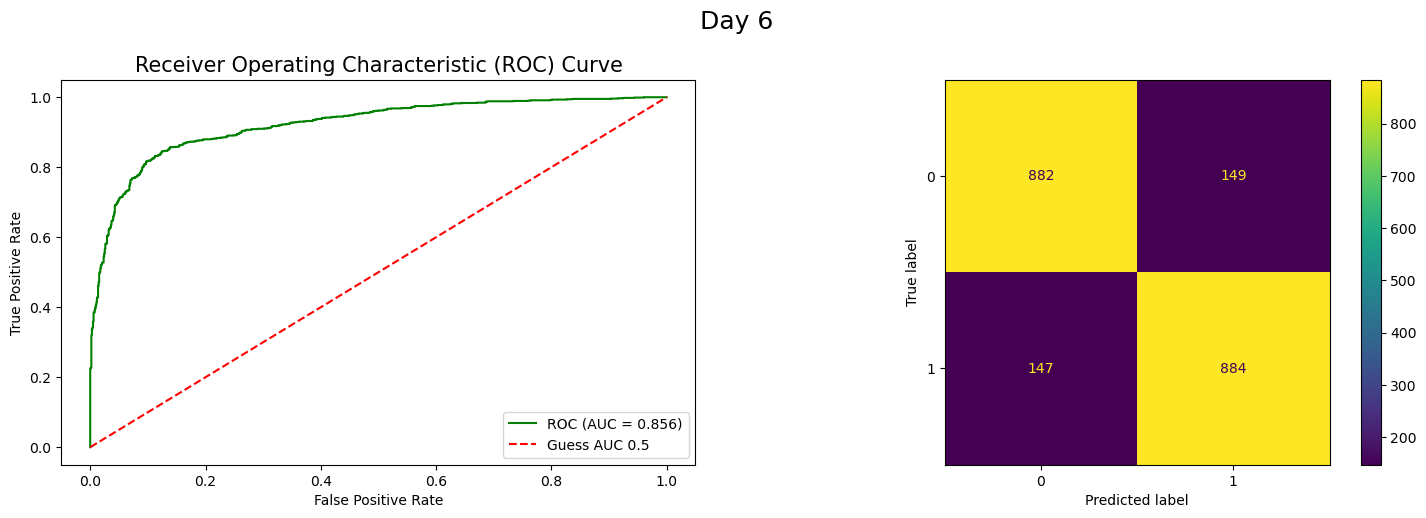

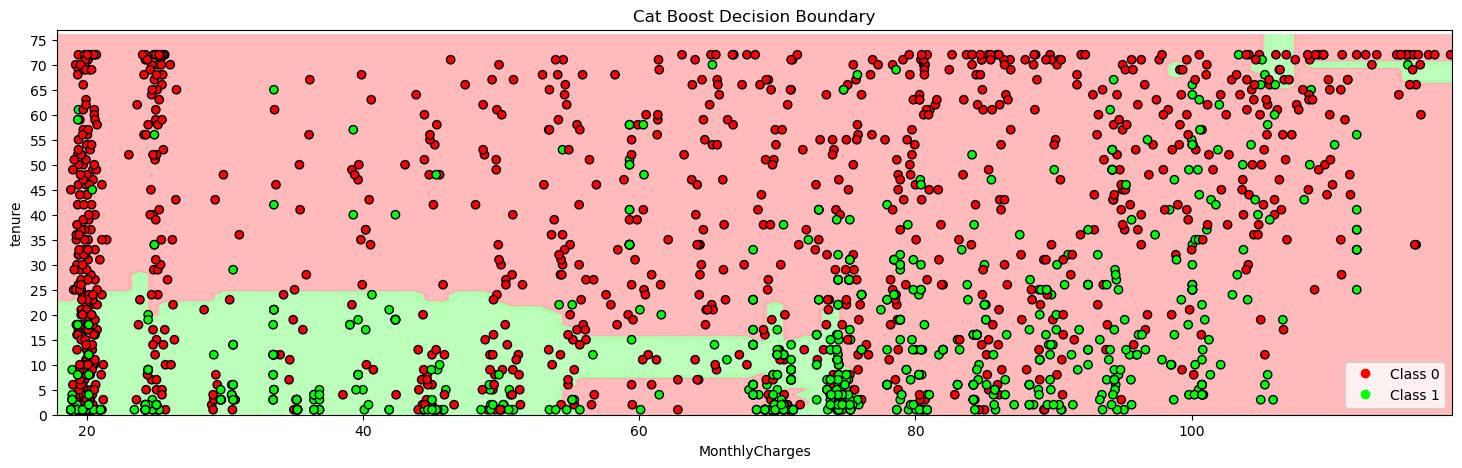

In [41]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.25,random_state=42,stratify=y_train)

rskf = RepeatedStratifiedKFold(n_repeats=3, n_splits=3, random_state=42)

cat=CatBoostClassifier(random_state=42, eval_metric='F1', verbose=100,n_estimators=500)

cat.fit(X_train, y_train, eval_set=(X_valid, y_valid))

# Evaluation
cv_results = cross_validate(cat, X_train, y_train, cv=rskf, scoring=['recall', 'roc_auc'], n_jobs=-1, return_train_score=True, error_score="raise")
print(f'Mean Train roc auc Score: {cv_results["train_roc_auc"].mean()}')
print(f'Mean Train recall Score: \033[1m{cv_results["train_recall"].mean()}\033[0m\n')

print(f'Mean Test roc auc Score: {cv_results["test_roc_auc"].mean()}')
print(f'Mean Test recall Score: \033[1m{cv_results["test_recall"].mean()}\033[0m')

predictions_prob = cross_val_predict(cat, X_test, y_test, method='predict_proba', n_jobs=-1)
predictions = [0 if x < 0.5 else 1 for x in predictions_prob[:, 1]]
roc_auc = roc_auc_score(y_test, predictions)
recall = recall_score(y_test, predictions)
coef = matthews_corrcoef(y_test, predictions)
print(f"\033[1mRecall score: {recall:.2f}\033[0m")
print(f"Correlation: {coef}")
print("\033[4mClassification Report\033[0m\n", classification_report(y_test, predictions))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob[:, 1])
plot_evaluation(fpr, tpr, y_test, predictions, roc_auc,title='Day 6')
feature1 = 'MonthlyCharges'
feature2 = 'tenure'
decision_boundary(X_test,y_test,feature1,feature2,cat,transformer=None,title="Cat Boost")

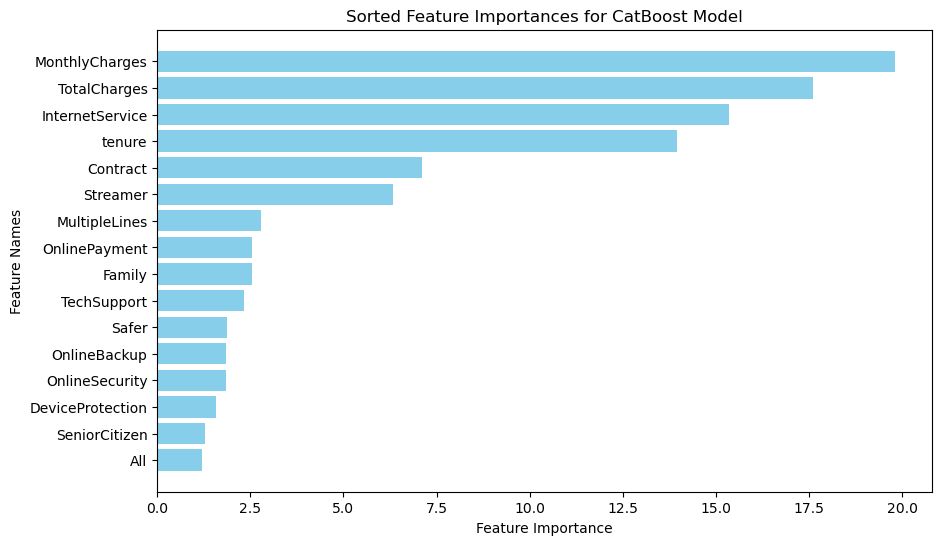

In [42]:
feature_importances = cat.get_feature_importance()
feature_names = cat.feature_names_

# Create a DataFrame to sort the importances
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Sorted Feature Importances for CatBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()


- Focusing on the important features. feature engineer can be done further for better performance

## Conclusion
- 86% of churners are identified with 86% precision (chance that our predicted churners are actually churners). Indicating most of our predicted churners are actual Churners